1. stany bella 
2. 

In [5]:
import pennylane as qml
import pennylane.numpy as np

dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circ():
    qml.X(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


state = circ()
print(state)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


In [6]:
@qml.qnode(dev)
def circ2():
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


state = circ2()
print(state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


(<Figure size 500x300 with 1 Axes>, <Axes: >)

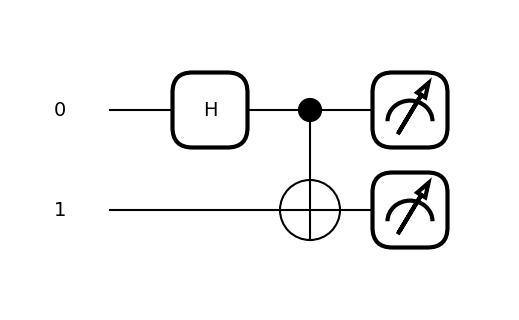

In [8]:
qml.draw_mpl(circ2)()

--- Obwód 1: Stan Splątany Bella ---


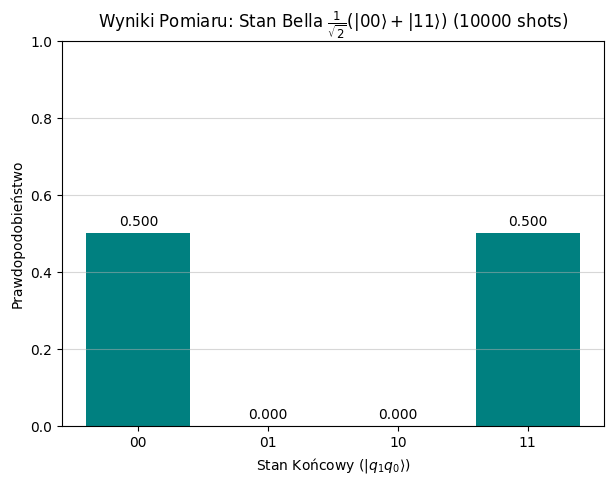


--- Obwód 2: Dwie Bramki Hadamarda ---


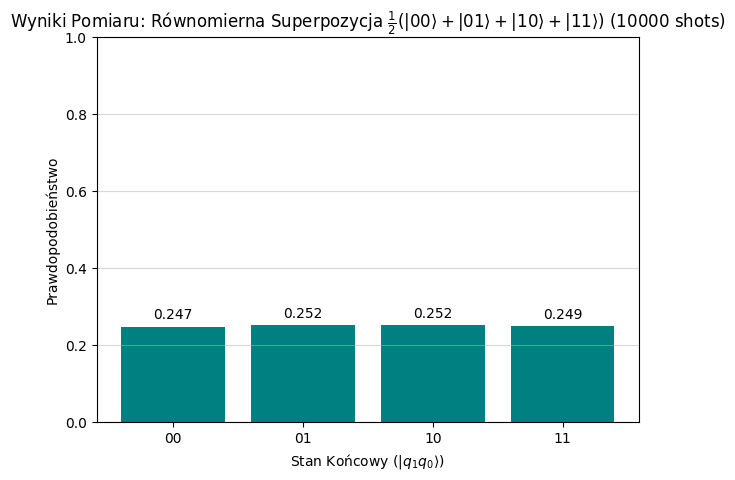


--- Obwód 3: Stan Początkowy (Brak Operacji) ---


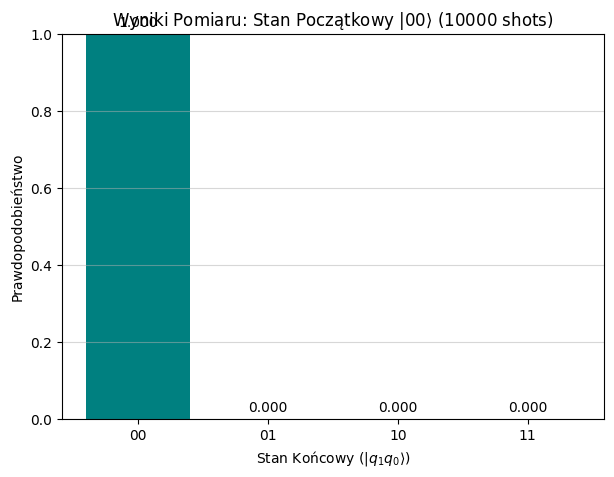

In [24]:
import pennylane as qml
import matplotlib.pyplot as plt
import numpy as np

# 1. Ustawienia
SHOTS = 10000 
dev = qml.device("default.qubit", wires=2, shots=SHOTS)
# Wszystkie możliwe stany końcowe dla 2 kubitów
ALL_STATES = ['00', '01', '10', '11']

# 2. Definicje Obwodów Kwantowych

# Obwód 1: Stan Splątany Bella (1/sqrt(2) * (|00> + |11>))
@qml.qnode(dev)
def circ_bell():
    qml.H(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts()

# Obwód 2: Dwie Bramki Hadamarda (1/2 * (|00> + |01> + |10> + |11>))
@qml.qnode(dev)
def circ_h_h():
    qml.H(wires=0)
    qml.H(wires=1)
    return qml.counts()

# Obwód 3: Brak Operacji (Stan Początkowy |00>) - Działanie jak brak bramki H
@qml.qnode(dev)
def circ_zero():
    # Brak bramek
    return qml.counts()


# 3. Funkcja do Wizualizacji (Zapewnia stałą oś X)
def plot_counts_histogram(counts, title):
    """Generuje histogram, wyświetlając wszystkie 4 stany (00, 01, 10, 11)."""
    
    # 1. Uzupełnienie zliczeń dla wszystkich stanów (jeśli stan nie wystąpił, ma 0)
    full_counts = {state: counts.get(state, 0) for state in ALL_STATES}
    
    # 2. Obliczenie prawdopodobieństw
    probabilities = [full_counts[state] / SHOTS for state in ALL_STATES]
    
    # 3. Rysowanie wykresu
    plt.figure(figsize=(7, 5))
    plt.bar(ALL_STATES, probabilities, color='teal')
    plt.xlabel("Stan Końcowy ($|q_1 q_0 \\rangle$)")
    plt.ylabel("Prawdopodobieństwo")
    plt.title(title + f" ({SHOTS} shots)")
    plt.ylim(0, 1) 
    plt.grid(axis='y', alpha=0.5)

    # Dodanie wartości prawdopodobieństw nad słupkami
    for i, prob in enumerate(probabilities):
        plt.text(i, prob + 0.02, f'{prob:.3f}', ha='center', fontsize=10)

    plt.show()

# 4. Wykonanie i Wizualizacja
print("--- Obwód 1: Stan Splątany Bella ---")
counts_bell = circ_bell()
plot_counts_histogram(counts_bell, "Wyniki Pomiaru: Stan Bella $\\frac{1}{\\sqrt{2}}(|00\\rangle + |11\\rangle)$")

print("\n--- Obwód 2: Dwie Bramki Hadamarda ---")
counts_h_h = circ_h_h()
plot_counts_histogram(counts_h_h, "Wyniki Pomiaru: Równomierna Superpozycja $\\frac{1}{2}(|00\\rangle + |01\\rangle + |10\\rangle + |11\\rangle)$")

print("\n--- Obwód 3: Stan Początkowy (Brak Operacji) ---")
counts_zero = circ_zero()
plot_counts_histogram(counts_zero, "Wyniki Pomiaru: Stan Początkowy $|00\\rangle$")

In [10]:
@qml.qnode(dev)
def circ3(theta):
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    qml.RZ(theta, wires=0)
    return qml.probs(wires=[0,1])


state = circ3(np.pi)
print(state)

[0.5 0.  0.  0.5]


(<Figure size 600x300 with 1 Axes>, <Axes: >)

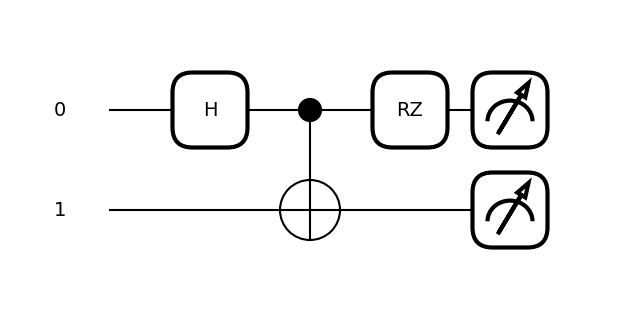

In [11]:
qml.draw_mpl(circ3)(np.pi)

In [12]:
# wartosc oczekiwana 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def qc(test='0'):
    if test == '1':
        qml.X(wires=0)
    return qml.expval(qml.PauliZ(wires=0))

(<Figure size 400x200 with 1 Axes>, <Axes: >)

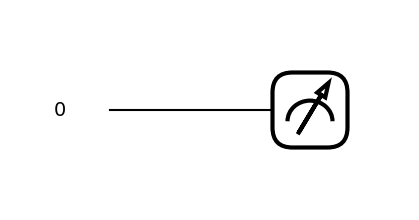

In [13]:
qml.draw_mpl(qc)()

(<Figure size 400x200 with 1 Axes>, <Axes: >)

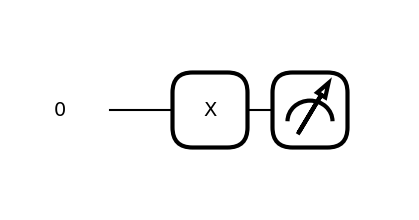

In [14]:
qml.draw_mpl(qc)('1')

In [15]:
qc(), qc('1')

(np.float64(1.0), np.float64(-1.0))

In [28]:
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def qn(theta):
    qml.X(wires=0)
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))


theta = 3.14 # tak nie !!!
theta = np.array([3.13], requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100
for epoch in range(epochs):
    theta, cost = opt.step_and_cost(qn, theta)
    if epoch % 10 == 0:
        print(f"Theta: {theta}, Cost: {cost}")

Theta: [3.12884076], Cost: [0.99993281]
Theta: [3.10851975], Cost: [0.99954803]
Theta: [3.0558488], Cost: [0.99696296]
Theta: [2.91986733], Cost: [0.97972892]
Theta: [2.57778269], Cost: [0.87049361]
Theta: [1.8364975], Cost: [0.35163303]
Theta: [0.88932495], Cost: [-0.56371304]
Theta: [0.33249582], Cost: [-0.93286178]
Theta: [0.11704127], Cost: [-0.99156122]
Theta: [0.04085768], Cost: [-0.99896979]


## 🧐 Wyjaśnienie Działania Funkcji Kosztu w VQA (Mini-Eksperyment)


W tym prostym eksperymencie z **Wariacyjnym Algorytmem Kwantowym (VQA)**, optymalizator (Gradient Descent) minimalizuje funkcję kosztu, choć nie została ona jawnie zdefiniowana jako np. Mean Squared Error (MSE). Dzieje się tak, ponieważ w bibliotekach takich jak PennyLane, optymalizator domyślnie przyjmuje, że to, co zwraca $\mathbf{QNode}$ jest **funkcją celu**, którą należy minimalizować.

### 1. Definicja Kosztu Przez Operator PauliZ

Twój obwód `qn(theta)` jest zdefiniowany następująco:

$$\mathbf{qn}(\theta) = \bra{\psi(\theta)} \mathbf{Z} \ket{\psi(\theta)} = \langle \mathbf{Z} \rangle$$

Ponieważ $\mathbf{qn}(\theta)$ zwraca **Wartość Oczekiwaną operatora PauliZ** ($\langle \mathbf{Z} \rangle \in [-1, 1]$), optymalizator traktuje ten wynik jako funkcję kosztu $\mathbf{C}(\theta)$, którą należy sprowadzić do najniższej możliwej wartości, czyli **$-1$**.

$$\text{Optymalizator dąży do minimalizacji: } \mathbf{C}(\theta) = \langle \mathbf{Z} \rangle$$

### 2. Cel Obwodu Kwantowego

W tym kontekście, obwód VQA jest używany do znalezienia **stanu własnego** operatora $\mathbf{Z}$ odpowiadającego **najniższej wartości własnej** ($\lambda = -1$). Jest to analogiczne do algorytmu **Variational Quantum Eigensolver (VQE)**, który służy do znajdowania energii stanu podstawowego (najniższej wartości własnej Hamiltonianu).

* **Pożądany Stan:** Stan $\ket{1}$, dla którego $\mathbf{Z}\ket{1} = -1\ket{1}$ (minimalna wartość oczekiwana).
* **Architektura Obwodu:**
    1.  `qml.X(wires=0)`: Ustawia kubit w stan $\ket{1}$.
    2.  `qml.RY(theta, wires=0)`: Wprowadza parametr $\theta$, który perturbuje stan $\ket{1}$.
* **Działanie Optymalizatora:** Zaczynając z $\theta$ bliskim zera (gdzie $\langle \mathbf{Z} \rangle \approx -1$), optymalizator bardzo szybko dąży do kąta $\theta$, który minimalizuje perturbację, czyli $\theta \to 0$ lub $\theta \to 2\pi$. W tych punktach stan wraca do $\ket{1}$, a koszt osiąga swoje minimum $-1$.

---

### 💡 Podsumowanie

Eksperyment ten demonstruje podstawową funkcjonalność **wariacyjnego uczenia maszynowego w kwantowym kontekście**, gdzie **sam obwód kwantowy** może definiować funkcję celu (Hamiltonian), a klasyczny optymalizator znajduje parametry $\theta$, które minimalizują tę funkcję. Jest to archetyp podejścia hybrydowego (klasyczny optymalizator + kwantowe przetwarzanie).

---

--- Rozpoczęcie treningu ---
Epoka:   0 | Kąt theta: 3.1306 | Koszt: 1.0000
Epoka:  10 | Kąt theta: 3.1131 | Koszt: 0.9997
Epoka:  20 | Kąt theta: 3.0676 | Koszt: 0.9977
Epoka:  30 | Kąt theta: 2.9502 | Koszt: 0.9849
Epoka:  40 | Kąt theta: 2.6524 | Koszt: 0.9022
Epoka:  50 | Kąt theta: 1.9802 | Koszt: 0.4770
Epoka:  60 | Kąt theta: 1.0194 | Koszt: -0.4456
Epoka:  70 | Kąt theta: 0.3899 | Koszt: -0.9082
Epoka:  80 | Kąt theta: 0.1377 | Koszt: -0.9883
Epoka:  90 | Kąt theta: 0.0481 | Koszt: -0.9986
Epoka:  99 | Kąt theta: 0.0186 | Koszt: -0.9998

--- Trening zakończony ✅ ---
Końcowy kąt theta: 0.0186
Końcowy koszt: -0.9998


<>:53: SyntaxWarning: invalid escape sequence '\l'
<>:53: SyntaxWarning: invalid escape sequence '\l'
/var/folders/53/b8z3c5xs0l51w2mzflnyk6400000gn/T/ipykernel_62193/4293797474.py:53: SyntaxWarning: invalid escape sequence '\l'
  axes[0].set_ylabel('Koszt ($\langle \\mathbf{Z} \\rangle$)')


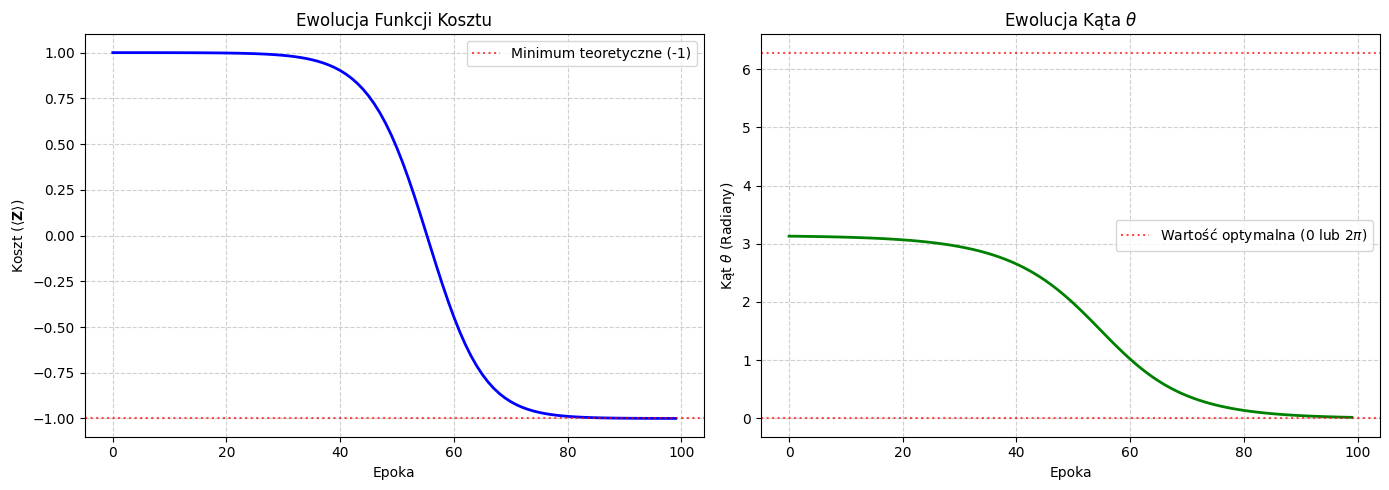

In [36]:
import pennylane as qml
import pennylane.numpy as np
import matplotlib.pyplot as plt

# 1. Definicja Urządzenia i Obwodu Kwantowego
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def qn(theta):
    qml.X(wires=0)       # Ustawia stan na |1> (expval Z = -1)
    qml.RY(theta, wires=0) # Obrót wokół Y (zmienia expval Z)
    return qml.expval(qml.PauliZ(0)) # Funkcja celu: minimalizujemy expval Z

# 2. Inicjalizacja Parametrów i Optymalizatora
# Zaczynamy z theta, gdzie koszt nie jest minimalny, aby zobaczyć proces optymalizacji.
# Np. theta = pi/2, gdzie RY(pi/2) na |1> daje 1/sqrt(2)(|1> - |0>), a expval Z = 0.
theta_init = np.array([np.pi-0.01], requires_grad=True) 
opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100

# Listy do przechowywania historii treningu
cost_history = []
theta_history = []

# 3. Pętla Treningowa
theta = theta_init # Ustawienie początkowej wartości theta

print("--- Rozpoczęcie treningu ---")
for epoch in range(epochs):
    # Wykonaj krok optymalizatora i oblicz koszt
    theta, cost = opt.step_and_cost(qn, theta)
    
    # Zapisz historię
    cost_history.append(cost)
    theta_history.append(theta[0]) # theta jest tablicą numpy, bierzemy tylko wartość

    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Epoka: {epoch:3d} | Kąt theta: {theta.item():.4f} | Koszt: {cost.item():.4f}")

print("\n--- Trening zakończony ✅ ---")
print(f"Końcowy kąt theta: {theta.item():.4f}") 
print(f"Końcowy koszt: {cost.item():.4f}")

# 4. Wizualizacja Historii Treningu
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Wykres kosztu
axes[0].plot(range(epochs), cost_history, color='blue', linewidth=2)
axes[0].set_title('Ewolucja Funkcji Kosztu')
axes[0].set_xlabel('Epoka')
# POPRAWIONA LINIA: Poprawna składnia LaTeX dla wartości oczekiwanej
axes[0].set_ylabel('Koszt ($\langle \\mathbf{Z} \\rangle$)') 
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].axhline(-1, color='red', linestyle=':', label='Minimum teoretyczne (-1)', alpha=0.7)
axes[0].legend()


# Wykres kąta theta
axes[1].plot(range(epochs), theta_history, color='green', linewidth=2)
axes[1].set_title('Ewolucja Kąta $\\theta$')
axes[1].set_xlabel('Epoka')
axes[1].set_ylabel('Kąt $\\theta$ (Radiany)')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].axhline(0, color='red', linestyle=':', label='Wartość optymalna (0 lub $2\\pi$)', alpha=0.7)
axes[1].axhline(2 * np.pi, color='red', linestyle=':', alpha=0.7)
axes[1].legend()

plt.tight_layout() # Teraz powinno działać poprawnie
plt.show()

Theta: [-3.12884076], Cost: [0.99993281]
Theta: [-3.10851975], Cost: [0.99954803]
Theta: [-3.0558488], Cost: [0.99696296]
Theta: [-2.91986733], Cost: [0.97972892]
Theta: [-2.57778269], Cost: [0.87049361]
Theta: [-1.8364975], Cost: [0.35163303]
Theta: [-0.88932495], Cost: [-0.56371304]
Theta: [-0.33249582], Cost: [-0.93286178]
Theta: [-0.11704127], Cost: [-0.99156122]
Theta: [-0.04085768], Cost: [-0.99896979]


In [20]:
dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def qn2(theta):
    qml.H(wires=0)
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

epochs = 100
for epoch in range(epochs):
    theta = opt.step(qn2, theta)
    if epoch % 10 == 0:
        print(f"Theta: {theta}")

Theta: [0.08415618]
Theta: [0.93391804]
Theta: [1.34076057]
Theta: [1.49022288]
Theta: [1.54268648]
Theta: [1.56099437]
Theta: [1.56737857]
Theta: [1.56960463]
Theta: [1.57038081]
Theta: [1.57065144]


$$\mathbf{R_X}(\theta) \ket{0} = \cos\left(\frac{\theta}{2}\right) \ket{0} - i \sin\left(\frac{\theta}{2}\right) \ket{1} $$
Wtedy wartość oczekiwana operatora $\mathbf{Z}$ jest równa: $$\langle \mathbf{Z} \rangle = \cos(\theta) $$
Ponieważ funkcja $\cos(\theta)$ jest ciągła i przyjmuje wartości w zakresie $[-1, 1]$, jej wykres idealnie demonstruje to, co chcesz osiągnąć. 


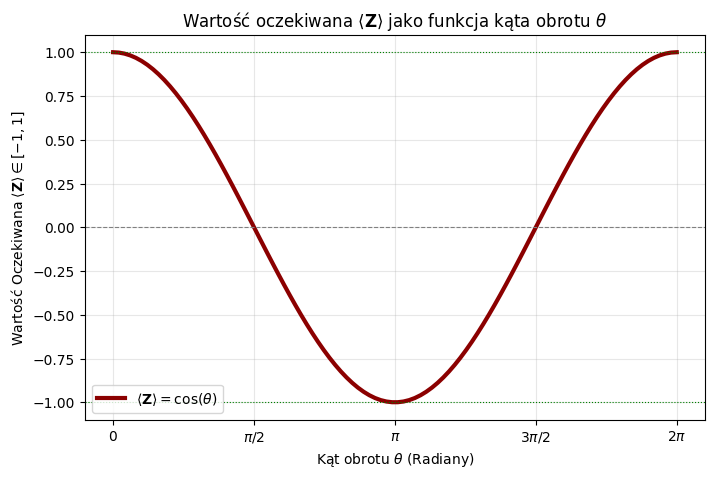

In [25]:
import pennylane as qml 
import pennylane.numpy as np 
import matplotlib.pyplot as plt 
# 1. Definicja Urządzenia (1 kubit) 
dev = qml.device('default.qubit', wires=1) 
# 2. Poprawiony Obwód Kwantowy z Parametryczną Bramką RX 
@qml.qnode(dev) 
def continuous_expval(theta): 
    """ Obwód stosuje rotację RX z kątem theta. Zwraca wartość oczekiwaną operatora PauliZ, która jest równa cos(theta). """ 
    # Zastosowanie bramki obrotu RX 
    qml.RX(theta, wires=0) 
    return qml.expval(qml.PauliZ(wires=0)) 
# 3. Generowanie Danych 
# # Tworzymy wektor kątów theta od 0 do 2*pi (pełny obrót) 
theta_vals = np.linspace(0, 2 * np.pi, 100) 
# Obliczamy wartość oczekiwaną dla każdego kąta 
expval_vals = [continuous_expval(theta) for theta in theta_vals] 
# 4. Wizualizacja Wyników 
plt.figure(figsize=(8, 5)) 
plt.plot(theta_vals, expval_vals, label=r'$\langle \mathbf{Z} \rangle = \cos(\theta)$', color='darkred', linewidth=3)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) 
# Linia y=0 
plt.axhline(1, color='green', linestyle=':', linewidth=0.8) # Linia y=1 
plt.axhline(-1, color='green', linestyle=':', linewidth=0.8) # Linia y=-1 
# Oznaczenia 
plt.title(r'Wartość oczekiwana $\langle \mathbf{Z} \rangle$ jako funkcja kąta obrotu $\theta$') 
plt.xlabel(r'Kąt obrotu $\theta$ (Radiany)') 
plt.ylabel(r'Wartość Oczekiwana $\langle \mathbf{Z} \rangle \in [-1, 1]$') 
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']) 
plt.grid(True, linestyle='-', alpha=0.3) 
plt.legend() 
plt.show()

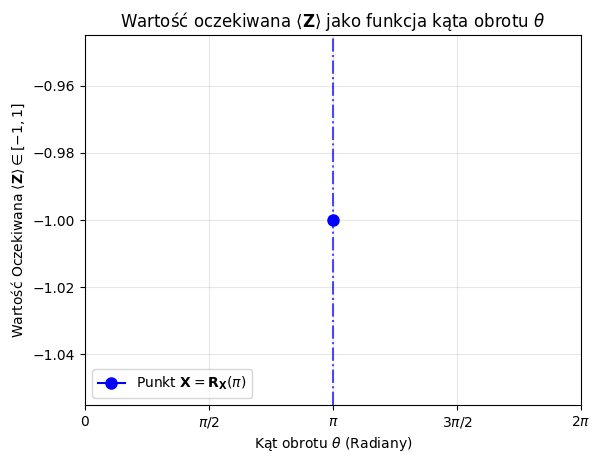

In [ ]:
# --- Dodanie Oznaczenia dla Bramki X (theta = pi) ---
pi_angle = np.pi
pi_expval = continuous_expval(pi_angle) # Wartość oczekiwana = -1.0

# Pionowa linia w theta = pi
plt.axvline(pi_angle, color='blue', linestyle='-.', linewidth=1.5, alpha=0.7)
# Punkt na wykresie
plt.plot(pi_angle, pi_expval, marker='o', color='blue', markersize=8, label=r'Punkt $\mathbf{X} = \mathbf{R_X}(\pi)$')

# Oznaczenia
plt.title(r'Wartość oczekiwana $\langle \mathbf{Z} \rangle$ jako funkcja kąta obrotu $\theta$')
plt.xlabel(r'Kąt obrotu $\theta$ (Radiany)')
plt.ylabel(r'Wartość Oczekiwana $\langle \mathbf{Z} \rangle \in [-1, 1]$')
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], 
           [r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend(loc='lower left')
plt.show()